In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 100)   


In [3]:
df=pd.read_csv('Bengaluru_House_Data.csv')
df.head(7)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00


In [4]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
df=df.dropna(subset=['location'])
df.isnull().sum()

area_type          0
availability       0
location           0
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [8]:
df['bath']=df['bath'].fillna(df['bath'].median())
df['balcony']=df['balcony'].fillna(df['balcony'].median())

In [9]:
df['BHK'] = df['size'].fillna('0 BHK')
df['BHK']=df['BHK'].apply(lambda x: int(x.split(' ')[0]))
df['availability'] = np.where(df['availability']=='Ready To Move',1,0)
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,0,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2
1,Plot Area,1,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4
2,Built-up Area,1,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,3
3,Super built-up Area,1,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3
4,Super built-up Area,1,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,2


In [10]:
df = df.drop(['size'], axis=1)
df

,area_type,availability,location,society,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,0,Electronic City Phase II,Coomee,1056,2.0,1.0,39.07,2
1,Plot Area,1,Chikka Tirupathi,Theanmp,2600,5.0,3.0,120.00,4
2,Built-up Area,1,Uttarahalli,NaN,1440,2.0,3.0,62.00,3
3,Super built-up Area,1,Lingadheeranahalli,Soiewre,1521,3.0,1.0,95.00,3
4,Super built-up Area,1,Kothanur,NaN,1200,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,1,Whitefield,ArsiaEx,3453,4.0,0.0,231.00,5
13316,Super built-up Area,1,Richards Town,NaN,3600,5.0,2.0,400.00,4
13317,Built-up Area,1,Raja Rajeshwari Nagar,Mahla T,1141,2.0,1.0,60.00,2
13318,Super built-up Area,0,Padmanabhanagar,SollyCl,4689,4.0,1.0,488.00,4


In [11]:
# def barplot(dataframe, x_val, y_val):
#     sns.barplot(data=dataframe, x=x_val, y=y_val)
#     plt.title(x_val.title() + ' vs ' + y_val.title())
#     plt.show()
# for i in df.columns:
#     for j in df.columns:
#         barplot(df,i,j)

In [12]:
# from sklearn.preprocessing import LabelEncoder
# le_location = LabelEncoder()
# le_society = LabelEncoder()
# le_areatype=LabelEncoder()
# df['society'] = df['society'].fillna('Unknown')
# df['location_encoded'] = le_location.fit_transform(df['location'])
# df['society_encoded'] = le_society.fit_transform(df['society'])
# df['area_type_encoded']=le_areatype.fit_transform(df['area_type'])
# print("Number of unique locations:", len(df['location'].unique()))
# print("Number of unique societies:", len(df['society'].unique()))
# print("Number of unique societies:", len(df['area_type'].unique()))
# print("\nSample of encoded data:")
# print(df[['location', 'location_encoded', 'society', 'society_encoded','area_type','area_type_encoded']].head())

In [13]:
df['location'] = df['location'].str.strip()
location_counts = df['location'].value_counts()
df['location'] = df['location'].apply(lambda x: 'other' if location_counts[x.strip()] <= 10 else x)
df.head(15)

,area_type,availability,location,society,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,0,Electronic City Phase II,Coomee,1056,2.0,1.0,39.07,2
1,Plot Area,1,Chikka Tirupathi,Theanmp,2600,5.0,3.0,120.00,4
2,Built-up Area,1,Uttarahalli,NaN,1440,2.0,3.0,62.00,3
3,Super built-up Area,1,Lingadheeranahalli,Soiewre,1521,3.0,1.0,95.00,3
4,Super built-up Area,1,Kothanur,NaN,1200,2.0,1.0,51.00,2
5,Super built-up Area,1,Whitefield,DuenaTa,1170,2.0,1.0,38.00,2
6,Super built-up Area,0,Old Airport Road,Jaades,2732,4.0,2.0,204.00,4
7,Super built-up Area,1,Rajaji Nagar,Brway G,3300,4.0,2.0,600.00,4
8,Super built-up Area,1,Marathahalli,NaN,1310,3.0,1.0,63.25,3
9,Plot Area,1,other,NaN,1020,6.0,2.0,370.00,6


In [14]:
df=df.drop(['society','area_type'],axis=1)
df

,availability,location,total_sqft,bath,balcony,price,BHK
0,0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,1,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,1,Uttarahalli,1440,2.0,3.0,62.00,3
3,1,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,1,Kothanur,1200,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...
13315,1,Whitefield,3453,4.0,0.0,231.00,5
13316,1,other,3600,5.0,2.0,400.00,4
13317,1,Raja Rajeshwari Nagar,1141,2.0,1.0,60.00,2
13318,0,Padmanabhanagar,4689,4.0,1.0,488.00,4


In [15]:
df.isnull().sum()

availability    0
location        0
total_sqft      0
bath            0
balcony         0
price           0
BHK             0
dtype: int64

In [16]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      shape=(2117,), dtype=object)

In [17]:
def isNum(x):
    try:
        return float(x)
    except:
        if '-' in x:
            i = x.split('-')
            if len(i) == 2:
                try:
                    return (float(i[0]) + float(i[1])) / 2
                except:
                    return np.nan
        nums = re.findall(r"[\d.]+", str(x))
        if len(nums) == 1:
            try:
                return float(nums[0])
            except:
                return np.nan
        elif len(nums) == 2:
            try:
                return (float(nums[0]) + float(nums[1])) / 2
            except:
                return np.nan
        else:
            return np.nan

In [18]:
df['total_sqft']

0        1056
1        2600
2        1440
3        1521
4        1200
         ... 
13315    3453
13316    3600
13317    1141
13318    4689
13319     550
Name: total_sqft, Length: 13319, dtype: object

In [19]:
df['total_sqft']=df['total_sqft'].apply(isNum)
df=df.dropna(subset=['total_sqft'])
df['total_sqft']

0        1056.0
1        2600.0
2        1440.0
3        1521.0
4        1200.0
          ...  
13315    3453.0
13316    3600.0
13317    1141.0
13318    4689.0
13319     550.0
Name: total_sqft, Length: 13287, dtype: float64

In [20]:
print("Duplicates before:", df.duplicated().sum())
df = df.drop_duplicates()
print("Duplicates after:", df.duplicated().sum())

Duplicates before: 799
Duplicates after: 0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12488 entries, 0 to 13318
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   availability  12488 non-null  int64  
 1   location      12488 non-null  object 
 2   total_sqft    12488 non-null  float64
 3   bath          12488 non-null  float64
 4   balcony       12488 non-null  float64
 5   price         12488 non-null  float64
 6   BHK           12488 non-null  int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 780.5+ KB


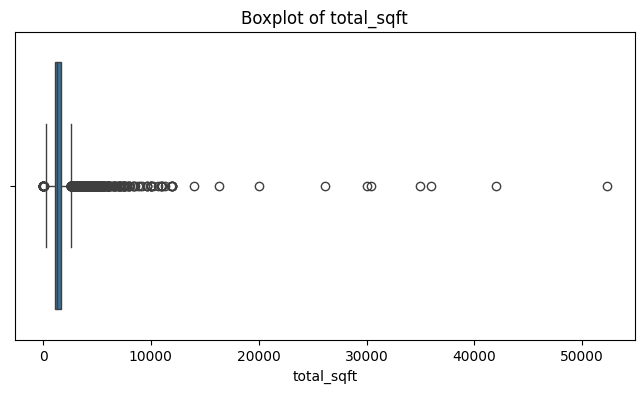

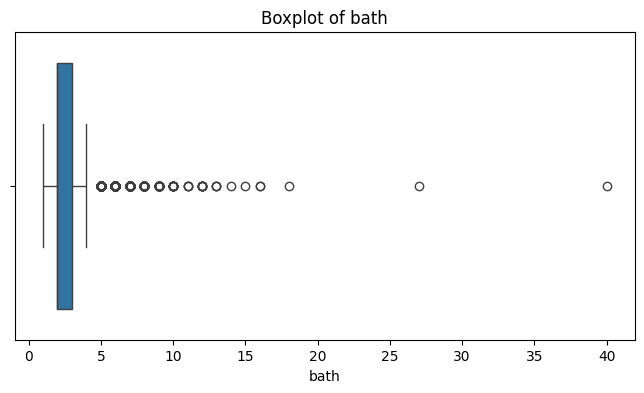

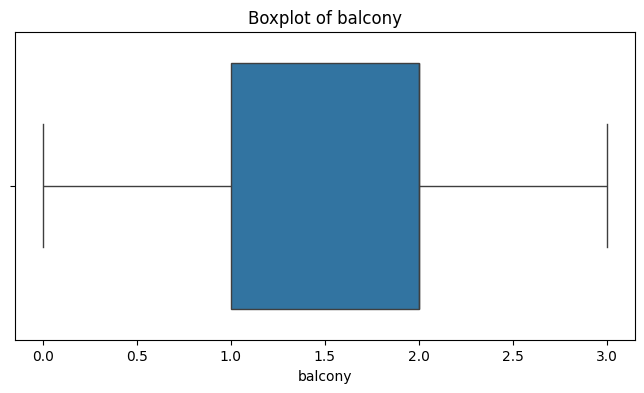

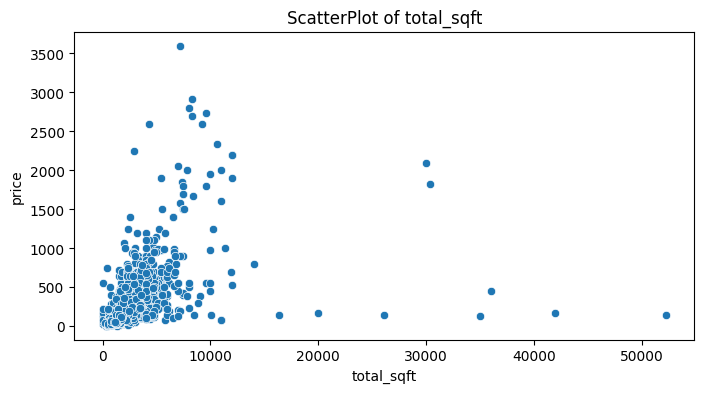

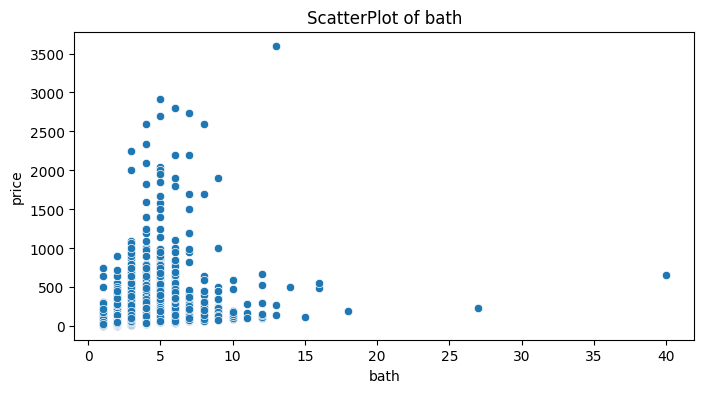

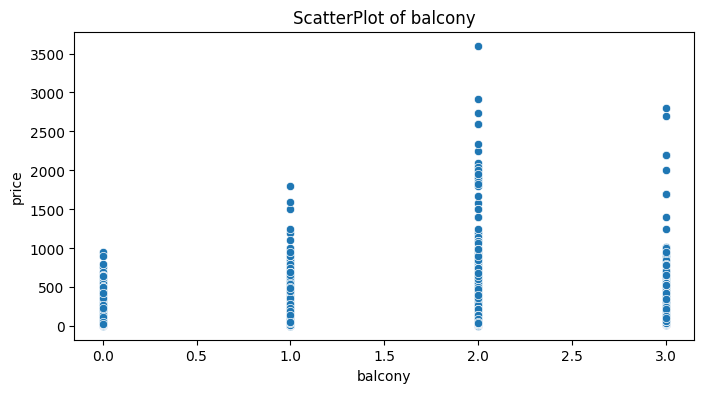

In [22]:
numeric_cols = [ 'total_sqft','bath', 'balcony']
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=df[col],y=df['price'])
    plt.title(f'ScatterPlot of {col}')
    plt.show()

In [23]:
df[df.bath<df.BHK+2]

,availability,location,total_sqft,bath,balcony,price,BHK
0,0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,1,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,1,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,1,Kothanur,1200.0,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...
13314,1,Green Glen Layout,1715.0,3.0,3.0,112.00,3
13315,1,Whitefield,3453.0,4.0,0.0,231.00,5
13316,1,other,3600.0,5.0,2.0,400.00,4
13317,1,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2


In [24]:
from scipy.stats import zscore

df = df[df['bath'] < df['BHK'] + 2]

df = df[df['total_sqft'] / df['BHK'] >= 300]

df['price_per_sqft'] = df['price'] * 100000 / df['total_sqft']
df = df[df['price_per_sqft'] <= df['price_per_sqft'].quantile(0.99)]
df = df[df['price_per_sqft'] >= df['price_per_sqft'].quantile(0.01)]

df = df[(np.abs(zscore(df['bath'])) < 3)]
df = df[(np.abs(zscore(df['total_sqft'])) < 3)]
df = df[(np.abs(zscore(df['BHK'])) < 3)]
df = df[(np.abs(zscore(df['balcony'])) < 3)]
df = df[(np.abs(zscore(df['price'])) < 3)]

# Drop the temporary column
df = df.drop('price_per_sqft', axis=1)

In [25]:
dummy=pd.get_dummies(df.location)
df=df.drop(['location'],axis=1)
dummy

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,Bannerghatta,Bannerghatta Road,Basavangudi,Basaveshwara Nagar,Battarahalli,Begur,Begur Road,Bellandur,Benson Town,Bharathi Nagar,Bhoganhalli,Billekahalli,Binny Pete,Bisuvanahalli,Bommanahalli,Bommasandra,Bommasandra Industrial Area,Bommenahalli,Brookefield,Budigere,CV Raman Nagar,Chamrajpet,Chandapura,Channasandra,Chikka Tirupathi,Chikkabanavar,Chikkalasandra,Choodasandra,Cooke Town,Cox Town,Cunningham Road,Dasanapura,Dasarahalli,Devanahalli,Devarachikkanahalli,Dodda Nekkundi,Doddaballapur,Doddakallasandra,Doddathoguru,Domlur,Dommasandra,EPIP Zone,Electronic City,Electronic City Phase II,Electronics City Phase 1,Frazer Town,GM Palaya,Garudachar Palya,Giri Nagar,Gollarapalya Hosahalli,Gottigere,Green Glen Layout,Gubbalala,Gunjur,HAL 2nd Stage,HBR Layout,HRBR Layout,HSR Layout,Haralur Road,Harlur,Hebbal,Hebbal Kempapura,Hegde Nagar,Hennur,Hennur Road,Hoodi,Horamavu Agara,Horamavu Banaswadi,Hormavu,Hosa Road,Hosakerehalli,Hoskote,Hosur Road,Hulimavu,ISRO Layout,ITPL,Iblur Village,Indira Nagar,JP Nagar,Jakkur,Jalahalli,Jalahalli East,Jigani,Judicial Layout,KR Puram,Kadubeesanahalli,Kadugodi,Kaggadasapura,Kaggalipura,Kaikondrahalli,Kalena Agrahara,Kalyan nagar,Kambipura,Kammanahalli,Kammasandra,Kanakapura,Kanakpura Road,Kannamangala,Karuna Nagar,Kasavanhalli,Kasturi Nagar,Kathriguppe,Kaval Byrasandra,Kenchenahalli,Kengeri,Kengeri Satellite Town,Kereguddadahalli,Kodichikkanahalli,Kodigehaali,Kodigehalli,Kodihalli,Kogilu,Konanakunte,Koramangala,Kothannur,Kothanur,Kudlu,Kudlu Gate,Kumaraswami Layout,Kundalahalli,LB Shastri Nagar,Laggere,Lakshminarayana Pura,Lingadheeranahalli,Magadi Road,Mahadevpura,Mahalakshmi Layout,Mallasandra,Malleshpalya,Malleshwaram,Marathahalli,Margondanahalli,Marsur,Mico Layout,Munnekollal,Murugeshpalya,Mysore Road,NGR Layout,NRI Layout,Nagarbhavi,Nagasandra,Nagavara,Nagavarapalya,Narayanapura,Neeladri Nagar,Nehru Nagar,OMBR Layout,Old Airport Road,Old Madras Road,Padmanabhanagar,Pai Layout,Panathur,Parappana Agrahara,Pattandur Agrahara,Poorna Pragna Layout,Prithvi Layout,R.T. Nagar,Rachenahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Rajiv Nagar,Ramagondanahalli,Ramamurthy Nagar,Rayasandra,Sahakara Nagar,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Thyagaraja Nagar,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False

In [26]:
data=pd.concat([df,dummy.drop('other',axis=1)],axis=1)
data.head()
data.columns

Index(['availability', 'total_sqft', 'bath', 'balcony', 'price', 'BHK', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout', 'Vittasandra', 'Whitefield',
       'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=247)